In [2]:
#pip install os
from google.colab import drive
import os 
import numpy as np
import pandas as pd
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/final_training_testing (1).csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(2)
sorted_df=df.sort_values(by='Timestamp_bid', ascending=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Postprocess the data

In [5]:
df.head(1)

,Timestamp_bid,User-Agent_bid,Region ID_bids_join_impressions,City ID,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,Bidding Price,Advertiser ID,User Profile IDs_bid,Timestamp_imp,User-Agent_imp,Log Type,Paying Price,User Profile IDs_imp,n_impressions,Timestamp,User-Agent,User Profile IDs,Region ID_clicks,n_clicks,has impression,has click,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,16593,16617,16661,16706
0,20130606000104044,mozilla/4.0 (compatible; msie 8.0; windows nt ...,80,80,1,300,250,0,1,0,227,3358,NaN,2.013061e+16,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,1.0,62.0,"10006,10063,10110",1.0,NaN,NaN,NaN,NaN,NaN,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(532897, 69)

## bid -> imp features and target


In [7]:
features1=[#'Timestamp_bid'
  #, 'User-Agent_bid'
  'City ID'
  , 'Ad Exchange'
  , 'Ad Slot Width'
  , 'Ad Slot Height'
  , 'Ad Slot Visibility'
  , 'Ad Slot Format'
  , 'Ad Slot Floor Price'
  , 'Bidding Price'
  , 'Advertiser ID'  
  ]

target1='has impression'

In [8]:
df[features1].head()

,City ID,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,Bidding Price,Advertiser ID
0,80,1,300,250,0,1,0,227,3358
1,107,2,728,90,0,0,162,238,3358
2,95,1,300,250,2,1,0,227,3427
3,275,2,120,600,0,0,250,300,3386
4,89,1,300,250,1,1,0,227,3427


# Train test split

## Full Dataset 

In [9]:
#full datset 
n = len(df)

df_train = df[0:int(n*0.8)]
df_test = df[int(n*0.8):]

X1_train=df_train[features1]
X1_test=df_test[features1]

y1_train=df_train[target1]
y1_test=df_test[target1]



print('X_train:', X1_train.shape
      , '\nX_test: ', X1_test.shape 
      , '\ny_train:', y1_train.shape
      , '\ny_test: ', y1_test.shape)


X_train: (426317, 9) 
X_test:  (106580, 9) 
y_train: (426317,) 
y_test:  (106580,)


## Small dataset

In [10]:
#small sample for quick training
X1_train_v1=df_train[features1]
X1_test_v1=df_test[features1]

y1_train_v1=df_train[target1]
y1_test_v1=df_test[target1]

print('X_train v1:', X1_train_v1.shape
      , '\nX_test v1: ', X1_test_v1.shape 
      , '\ny_train v1:', y1_train_v1.shape
      , '\ny_test v1: ', y1_test_v1.shape)

X_train v1: (426317, 9) 
X_test v1:  (106580, 9) 
y_train v1: (426317,) 
y_test v1:  (106580,)


## Post processing

# Baseline

## By Hand

In [126]:
## by hand
#training_accuracy=len(X1_train_v1[y1_train_v1==0])/len(y1_train_v1)
#print ('Training Accuracy:',training_accuracy)

#testing_accuracy=len(y1_test_v1[y1_test_v1==0])/len(y1_test_v1)
#print ('Testing Accuracy:',testing_accuracy)

## With baseline model


In [50]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy="prior")
baseline.fit(X1_train, y1_train)

joblib.dump(baseline, '/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/bid-->imp/baseline.pkl')

['/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/bid-->imp/baseline.pkl']

In [49]:
baseline.predict_proba(X1_train)

array([[0.76480412, 0.23519588],
       [0.76480412, 0.23519588],
       [0.76480412, 0.23519588],
       ...,
       [0.76480412, 0.23519588],
       [0.76480412, 0.23519588],
       [0.76480412, 0.23519588]])

In [48]:
baseline.predict_proba(X1_train)[:,0].sum()/len(X1_train)

0.764804124630264

# Logistic Regression

In [120]:
time_start = timer()
logistic_model = linear_model.LogisticRegression(solver='saga', max_iter=5000)
logistic_model.fit(X1_train,y1_train)
time_end= timer()
print ("Wall time for training logistic regression: %s second"%(time_end-time_start))

training_accuracy=metrics.log_loss(y1_train,logistic_model.predict_proba(X1_train))
print ('Training Accuracy:',training_accuracy)
test_accuracy = metrics.log_loss(y1_test, logistic_model.predict_proba(X1_test)) 
print('Accuracy of the model on unseen test data: ', test_accuracy)


Wall time for training linear SVM: 456.18851822800207 second
Training Accuracy: 0.4651866290277525
Accuracy of the model on unseen test data:  0.4016624076450597


In [121]:
from sklearn.externals import joblib
joblib.dump(logistic_model, '/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/bid-->imp/logistic.pkl')

['/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/bid-->imp/logistic.pkl']

# SVM linear

cannot predict proba...

In [91]:
time_start = timer()
linear_svc = svm.LinearSVC()
linear_svc.fit(X1_train_v1,y1_train_v1)
time_end= timer()
print ("Wall time for training linear SVM: %s second"%(time_end-time_start))

Wall time for training linear SVM: 0.7793917130002228 second


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Random Forest

# Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
time_start = timer()
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X1_train_v1,y1_train_v1)
time_end= timer()
print ("Wall time for training linear SVM: %s second"%(time_end-time_start))


training_accuracy=metrics.log_loss(y1_train_v1,dt_classifier.predict_proba(X1_train_v1))
print ('Training Accuracy:',training_accuracy)
test_accuracy = metrics.log_loss(y1_test_v1, dt_classifier.predict_proba(X1_test_v1)) 
print('Accuracy of the model on unseen test data: ', test_accuracy)

Wall time for training linear SVM: 0.01446532699992531 second
Training Accuracy: 0.010450155059292353
Accuracy of the model on unseen test data:  5.8155143317388385


# Model Comparison

In [51]:
models=[]

baseline=joblib.load('/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/bid-->imp/baseline.pkl')
logistic_model=joblib.load('/content/drive/MyDrive/Capstone/ipinyou/final/2.modeling/bid-->imp/logistic.pkl')


models.append(('baseline', baseline))
models.append(('logistic', logistic_model))
history={}
for name, model in models:
  history[name]={}
  #model.fit(X1_train_v1, y1_train_v1)
  #log loss
  history[name]['train log loss']=metrics.log_loss(y1_train, model.predict_proba(X1_train))
  history[name]['test log loss']=metrics.log_loss(y1_test, model.predict_proba(X1_test))
  #accuracy

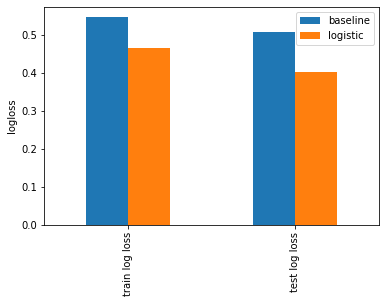

In [62]:
pd.DataFrame(history).plot(kind='bar', ylabel='logloss')

In [28]:
logistic_model.predict_proba(X1_train)

array([[0.44507492, 0.55492508],
       [0.69446014, 0.30553986],
       [0.45108469, 0.54891531],
       ...,
       [0.85774445, 0.14225555],
       [0.55414124, 0.44585876],
       [0.94556698, 0.05443302]])

In [29]:
baseline.predict_proba(X1_train)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [15]:
empirical=y1_train.sum()/len(y1_train)

In [16]:
print(empirical)

0.2351958753697366


In [18]:
metrics.log_loss(y1_train, np.repeat(empirical, len(y1_train)))

0.5454787533954227

In [ ]:
train_log_losses

{'model': {}}

In [ ]:
train_log_losses['model']['alpha']=1

In [ ]:
train_log_losses

{'model': {'alpha': 1}}